In [137]:
import pickle
import pandas as pd
import numpy as np
import geopandas as gp

In [111]:
df = pd.read_pickle('smallerdf')

In [112]:
df_gpby = df.groupby("neighborhood", as_index=False)['Rent'].mean()

In [113]:
df_gpby = df_gpby.sort_values('Rent')

In [114]:
df_gpby.reset_index(inplace=True)

In [115]:
del df_gpby['index']

In [116]:
df_gpby.reset_index(inplace=True)

In [117]:
df_gpby.columns = ['Rank', 'neighborhood', 'Rent']

,Address,Bath,Beds,Features,Kitchen,LivingSpace,Outdoor,Parking,Pets,Rent,...,Rooftop,Grill,Picnic Area,Waterfront,Deck,Fenced Lot,Garden,Lawn,Yard,Porch


In [119]:
df['Rank'] = [int(df_gpby[df_gpby.neighborhood == d].Rank) for d in df.neighborhood]

In [120]:
df.head()

,Address,Bath,Beds,Features,Kitchen,LivingSpace,Outdoor,Parking,Pets,Rent,Sqft,Zip,uFeatures,neighborhood,Rank
0,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,445,94103,"Bike Storage,Central Courtyard with Ping Pong,...",South of Market,56
1,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,445,94103,"Bike Storage,Central Courtyard with Ping Pong,...",South of Market,56
2,1222 Harrison StSan FranciscoCA94103,1.0,1,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",4136,680,94103,"Bike Storage,Central Courtyard with Ping Pong,...",South of Market,56
3,1222 Harrison StSan FranciscoCA94103,2.0,2,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",5342,982,94103,"Bike Storage,Central Courtyard with Ping Pong,...",South of Market,56
4,340 Fremont StSan FranciscoCA94105,1.0,0,"Washer/Dryer,Air Conditioning,Storage Units",Island Kitchen with Stainless Steel Appliances,Walk-In Closets,Sundeck,"Parking,Covered,Parking Available","Dogs and Cats Allowed:,0,$500 Deposit,$75 Mont...",3140,498,94105,Smoke Free Living,Rincon Hill,104


In [121]:
pets = []

for p in df.Pets:
    if isinstance(p, str):
        if 'Dogs and Cats Allowed' in p:
            pets.append(1)
        elif "Cats and Dogs Allowed" in p:
            pets.append(1)
        elif "Cats Allowed" in p:
            pets.append(1)
        elif "Dogs Allowed" in p:
            pets.append(1)
        elif "Pets Negotiable" in p:
            pets.append(1)
        else:
            pets.append(0)
    else:
        pets.append(0)
len(pets)

2757

In [122]:
df['Pets Allowed'] = pets

In [123]:
parking = []
value = 0
for p in df.Parking:
    if p:
        if "Garage" in p:
            value = 1
        elif "Surface" in p:
            value = 1
        elif "Street" in p:
            value = 0
        elif "Covered" in p:
            value = 1
        parking.append(value)
    else:
        parking.append(value)

In [124]:
df['Parking'] = parking

In [125]:
amenities = ["High Speed Internet Access","Ceiling Fan", "Tub/Shower", "Double Vanities","Alarm","Washer/Dryer", "Air Conditioning", "Storage Units", "Smoke Free", "Fireplace", "Heating", "Cable Ready"]

def get_vals(amen):
    temp = []
    for f in df.Features: 
        if f:
            if amen in f:
                temp.append(1)
            else:
                temp.append(0)
        else:
            temp.append(0)
    return temp

In [191]:
for a in amenities:
    df[a] = get_vals(a)
df[df.neighborhood == 'Clarendon Heights']

,Address,Bath,Beds,Features,Kitchen,LivingSpace,Outdoor,Parking,Pets,Rent,...,Rooftop,Grill,Picnic Area,Waterfront,Deck,Fenced Lot,Garden,Lawn,Yard,Porch
5275,91 Saint Germain AveSan FranciscoCA94114,3.0,4,None,None,None,None,1,None,9500,...,0,0,0,0,0,0,0,0,0,0


In [127]:
outdoor = ["Gated", "Balcony","Patio", "Sundeck", "Courtyard", "Rooftop", "Grill", "Picnic Area","Waterfront", "Deck", "Fenced Lot", "Garden", "Lawn", "Yard", "Porch"  ]

def get_vals(amen):
    temp = []
    for f in df.Outdoor: 
        if f:
            if amen in f:
                temp.append(1)
            else:
                temp.append(0)
        else:
            temp.append(0)
    return temp

for i in outdoor:
    df[i] = get_vals(i) 


In [128]:
df.shape

(2757, 43)

In [130]:
df.to_pickle('RankedNbhds')

In [456]:
%matplotlib inline

In [141]:

sf = gp.read_file('SF/geo_export_ba54c133-9f1c-4d00-9fe0-827d0bef3148.shp')
sf.head()

,link,name,geometry
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,POLYGON ((-122.4934552679999 37.78351817100008...
1,,Lake Street,POLYGON ((-122.4871507149999 37.78378542700005...
2,http://www.nps.gov/prsf/index.htm,Presidio National Park,POLYGON ((-122.4775801709999 37.81099311300005...
3,,Presidio Terrace,POLYGON ((-122.4724105299999 37.78734653900005...
4,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,POLYGON ((-122.4726257899999 37.78631480600006...


In [144]:
sf.columns = ['neighborhood', 'geometry']

In [170]:
new_thing = pd.merge(df_gpby, sf, left_on="neighborhood", right_on="neighborhood", how='right')

In [202]:
sf.neighborhood

0                          Seacliff
1                       Lake Street
2            Presidio National Park
3                  Presidio Terrace
4                    Inner Richmond
5                     Sutro Heights
6          Lincoln Park / Ft. Miley
7                    Outer Richmond
8                  Golden Gate Park
9                  Presidio Heights
10     Laurel Heights / Jordan Park
11                    Lone Mountain
12                       Anza Vista
13                       Cow Hollow
14                     Union Street
15                           Marina
16                   Telegraph Hill
17          Downtown / Union Square
18                       Tenderloin
19                     Civic Center
20                     Hayes Valley
21                     Alamo Square
22                        Panhandle
23                   Haight Ashbury
24                     Lower Haight
25                        Mint Hill
26                  Duboce Triangle
27                      Cole

In [172]:
new_thing.shape

(117, 4)

In [173]:
new_thing.head()

,Rank,neighborhood,Rent,geometry
0,0.0,Forest Hill,2150.00,POLYGON ((-122.4680732909999 37.74338394500006...
1,1.0,Chinatown,2185.00,POLYGON ((-122.4095410479999 37.79385192800004...
2,3.0,Sutro Heights,2200.00,POLYGON ((-122.5031047159999 37.78129638200005...
3,6.0,Tenderloin,2598.75,POLYGON ((-122.4098740169999 37.78714914200009...
4,12.0,Parnassus Heights,2750.00,POLYGON ((-122.4529470339999 37.76637407300007...


In [174]:
new_thing = gp.GeoDataFrame(new_thing, geometry='geometry')

In [210]:
new_thing[new_thing.neighborhood == 'Mission']

,Rank,neighborhood,Rent,geometry
55,87.0,Mission,4425.428571,POLYGON ((-122.4223648179999 37.76986769700005...


/Users/bekcunning/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


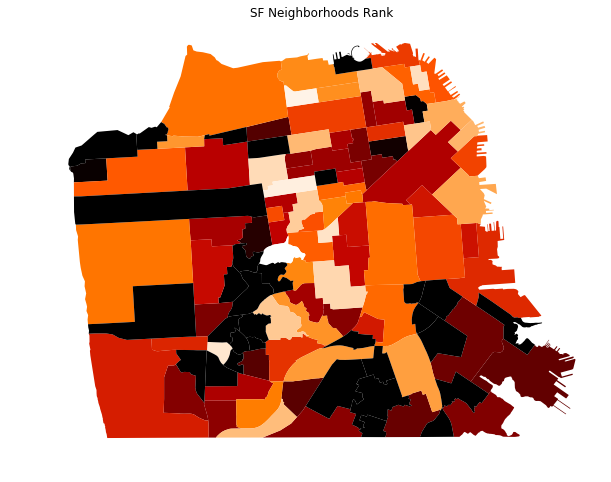

In [431]:
fig, ax = plt.subplots(1, figsize=(10,8))
_ = ax.axis('off')
new_thing = new_thing[new_thing.neighborhood != 'Treasure Island']
new_thing = new_thing[new_thing.neighborhood != 'Yerba Buena Island']

base = new_thing.plot(ax=ax, cmap = 'gist_heat', column='Rank')
base.plot()

ax.set_title('SF Neighborhoods Rank');

/Users/bekcunning/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


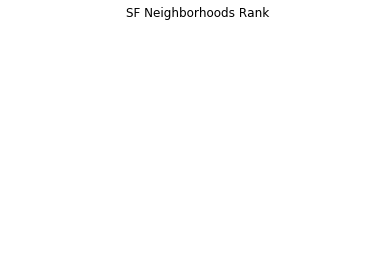

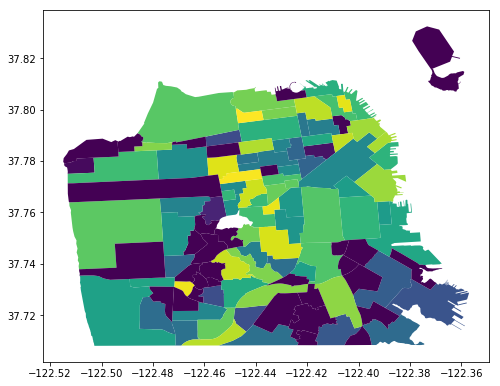

In [407]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
_ = ax.axis("off")
plt.title('SF Neighborhoods Rank')
new_thing[new_thing.neighborhood != 'Clarendon Heights'].plot(column='Rank', figsize = (8, 8))

In [317]:
marin = gp.read_file('City/City.shp')
marin.head()
marin = marin[['Name', 'geometry']]
marin.columns = ['neighborhood', 'geometry']

marin.head()

,neighborhood,geometry
0,Larkspur,POLYGON ((-122.5243029121294 37.95572865743023...
1,Mill Valley,POLYGON ((-122.5600658839977 37.92963285094756...
2,Corte Madera,POLYGON ((-122.5040388375632 37.94204254609092...
3,Belvedere,POLYGON ((-122.4760641078376 37.88599926119488...
4,San Anselmo,(POLYGON ((-122.5835276637802 37.9993797449077...


In [319]:
all_hoods = sf.append(marin)

In [457]:
oak = gp.read_file('CEDA_Nhhods02/CEDA_Neighborhoods2002.shp')
oak.columns = ['neighborhood', 'geometry']

In [386]:
oak_merge = pd.merge(df_gpby, oak, left_on="neighborhood", right_on="neighborhood", how='right')

In [380]:
oak = oak.to_crs(sf.crs)

In [388]:
oak_merge = oak_merge[oak_merge.Rent.notnull()]

In [390]:
oak_merge = gp.GeoDataFrame(oak_merge, geometry='geometry')

In [322]:
all_hoods = sf.append(oak)

In [323]:
all_hoods_df = pd.merge(df_gpby, all_hoods, left_on="neighborhood", right_on="neighborhood", how='right')

In [283]:
#all_hoods = all_hoods.append(the_rest)

In [325]:
all_hoods_df = pd.merge(df_gpby, all_hoods, left_on="neighborhood", right_on="neighborhood", how='left')

In [326]:
all_hoods_df.shape

(130, 4)

In [327]:
all_hoods_df.Rank.isnull().value_counts()

False    130
Name: Rank, dtype: int64

In [329]:
all_hoods_df.drop_duplicates('neighborhood', inplace=True)

In [330]:
all_hoods_df = all_hoods_df[all_hoods_df.geometry.notnull()]

In [331]:
all_hoods_df = gp.GeoDataFrame(all_hoods_df, geometry='geometry')

In [316]:
all_hoods_df.head()

,Rank,neighborhood,Rent,geometry
0,0,Forest Hill,2150.00,POLYGON ((-122.4680732909999 37.74338394500006...
1,1,Chinatown,2185.00,POLYGON ((-122.4095410479999 37.79385192800004...
4,3,Sutro Heights,2200.00,POLYGON ((-122.5031047159999 37.78129638200005...
6,5,Fairfax,2575.00,"POLYGON ((6071225.400917395 2108490.153050147,..."
7,6,Tenderloin,2598.75,POLYGON ((-122.4098740169999 37.78714914200009...


In [440]:
cities = gp.read_file('cb_2016_06_cousub_500k/cb_2016_06_cousub_500k.shp')

In [441]:
cities = cities[cities.NAME != 'San Francisco']

In [442]:
cities.crs

{'init': 'epsg:4269'}

In [443]:
sf.crs

{'init': 'epsg:4326'}

In [444]:
cities = cities.to_crs(sf.crs)

In [445]:
cities.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,037,92360,01935241,0600000US0603792360,0603792360,Palos Verdes,22,411491141,1204381663,"(POLYGON ((-118.428407 33.774715, -118.4270481..."
1,06,087,92900,01935295,0600000US0608792900,0608792900,Santa Cruz,22,262518300,201920667,"POLYGON ((-122.10232 37.033359, -122.100376 37..."
2,06,097,90510,01935055,0600000US0609790510,0609790510,Cloverdale-Geyserville,22,781028161,15578143,"POLYGON ((-123.271867 38.799168, -123.270082 3..."
3,06,085,93175,02583195,0600000US0608593175,0608593175,South Santa Clara Valley,22,303490589,1549654,"POLYGON ((-121.70535 37.12808, -121.70213 37.1..."
4,06,021,92280,01935233,0600000US0602192280,0602192280,Orland,22,1573088336,17733264,"POLYGON ((-122.93795 39.749883, -122.937427 39..."


In [446]:
cities = cities[['NAME', 'geometry']]

In [447]:
cities.columns = ['neighborhood', 'geometry']

In [450]:
all_cities_ = pd.merge(df_gpby[['Rank', 'Rent', 'neighborhood']], cities, left_on="neighborhood", right_on="neighborhood", how='left')
all_cities_ = all_cities_[all_cities_.geometry.notnull()]


In [451]:
all_cities_ = gp.GeoDataFrame(all_cities_, geometry='geometry')

In [362]:
all_hoods_df = pd.merge(df_gpby[['Rank', 'Rent', 'neighborhood']], cities, left_on="neighborhood", right_on="neighborhood", how='right')

In [363]:
all_hoods_df.shape

(513, 4)

In [366]:
all_hoods_geo = all_hoods_df[all_hoods_df.Rent.notnull()]

In [367]:
all_hoods_geo.shape

(91, 4)

In [368]:
all_hoods_geo = gp.GeoDataFrame(all_hoods_geo, geometry='geometry')

In [392]:
marin.head()

,neighborhood,geometry
0,Larkspur,POLYGON ((-122.5243029121294 37.95572865743023...
1,Mill Valley,POLYGON ((-122.5600658839977 37.92963285094756...
2,Corte Madera,POLYGON ((-122.5040388375632 37.94204254609092...
3,Belvedere,POLYGON ((-122.4760641078376 37.88599926119488...
4,San Anselmo,(POLYGON ((-122.5835276637802 37.9993797449077...


In [393]:
marin_hoods = pd.merge(df_gpby, marin, left_on="neighborhood", right_on="neighborhood", how='right')

In [435]:
marin_hoods = gp.GeoDataFrame(marin_hoods, geometry='geometry')
marin_hoods = marin_hoods[marin_hoods.Rank.notnull()]